Mariana Valenzuela Lafarga

# Examen A Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (37 puntos)


Se tiene un círculo de papel con el que quieres crear un cono para tomar agua. Tienes mucha sed, entonces quieres crear el cono más grande posible a partir de cortar la hora de papel que tienes.



![](e01-fig1.png)

1. Escribe el volumen del cono como función de las variables. Realiza este punto usando $\LaTeX$ y celdas *Markdown*.

$$V(r,h)= \frac{1}{3}\pi r^2 h$$

2. Encuentra una relación entre las variables y escribe el volumen del cono como función de $\theta$.
$$\theta R = 2 \pi r $$
$$r= \frac{\theta R}{2 \pi}$$
$$ V(\theta) = \frac{\pi}{3} (\frac{\theta R}{2\pi})^2 h$$

$$sen \theta = r/h$$

In [31]:
import numpy as np
import sympy as sp
r= sp.var("r")
h= sp.var("h")
theta= sp.var("theta")
pi= sp.var("pi")

In [32]:
restriccion= theta*10-2*pi*r
restriccion

-2*pi*r + 10*theta

In [33]:
r2= sp.solve(restriccion,r)[0]
r2

5*theta/pi

In [34]:
def V(r,h):
    return (pi/3)*r**2*h

In [37]:
restriccion2=  r2**2 + h**2 -10**2
restriccion2

h**2 - 100 + 25*theta**2/pi**2

In [40]:
h2= sp.solve(restriccion2,h)[1]
h2

5*sqrt(4*pi**2 - theta**2)/pi

In [42]:
V1= V(r,h).subs(r,r2).subs(h,h2)
V1

125*theta**2*sqrt(4*pi**2 - theta**2)/(3*pi**2)

In [43]:
dA= sp.diff(V1,theta)
dA

-125*theta**3/(3*pi**2*sqrt(4*pi**2 - theta**2)) + 250*theta*sqrt(4*pi**2 - theta**2)/(3*pi**2)

3. Determina el ángulo que maximiza el volumen del cono si el círculo tiene un radio de 10 cm. (Respuesta en radianes y grados)

In [46]:
x1=sp.solve(dA,theta)[2]
x1

2*sqrt(6)*pi/3

El angulo que maximiza el volumen del cono es $ \frac{2\sqrt(6) \pi}{3}$

3. ¿Cuánta agua cabe en el cono? (Respuesta en mililitros)

In [48]:
radiomenor= r2.subs(theta, x1)
radiomenor

10*sqrt(6)/3

In [49]:
altura= h2.subs(theta, x1)
altura

10*sqrt(3)*sqrt(pi**2)/(3*pi)

In [50]:
V(radiomenor,altura)

2000*sqrt(3)*sqrt(pi**2)/27

403 mililitros caben en el cono

## Correciones
- ¿Qué error fue?
Este problema es mucho de interpretación, en mi caso no se me había ocurrido irme por la longitud del arco y perímetro por lo que se me hizo dificil desarrollar el planteamiento del problema
- ¿Cómo lo solucioné?
Leyendo y analizando mucho mejor el problema, encontrando las ecuaciones correctas y que tuvieran sentido con el problema 
- ¿Qué puedo hacer para evitar este error en el futuro?
Creo que me falto plantear en papel y en dibujo el problema para darme una idea de cómo hacer las cosas y que ruta podía tomar

---
# Segundo punto. Programación lineal (37 puntos)

La compañía eléctrica de Saltadilla debe entregar 2000 megawatts hora (mwh) de electricidad cada hora. Una nueva ley para disminuir la contaminación entró en vigor y estipula que no se puede generar más de 1400 kgs de contaminantes por hora.

<table>
  <tr>
      <th>Método</th>
      <th>Resultados</th>
      <th>Costo/mwh</th>
  </tr>
  <tr>
      <td>Usar solución actual</td>
      <td>Contaminación = $\frac{5 kgs}{mwh}$</td>
      <td>$3.50$</td>
  </tr>
  <tr>
      <td>Solución baja en azufre</td>
      <td>Contaminación = $\frac{0.6 kgs}{mwh}$</td>
      <td>$5.00$</td>
  </tr>
  <tr>
      <td>Agregar filtro al producir</td>
      <td>Contaminación reducida por 90%</td>
      <td>$0.80$</td>
  </tr>

  <tr>
      <td> Importar energía </td>
      <td> Sin contaminación </td>
      <td> $4.00$ </td>
  </tr>
</table>

La compañía debe decidir cómo generar la energía que debe proveer. La única ciudad que tiene excedente de energía para exportar es Ciudad Capital, y sólo puede exportar 200 mwh. ¿Qué debería hacer la compañía?

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

x1= Usar solucion actual
x2= Solucion baja en azufre
x3= Solucion actual con filtro
x4= Solucion baja en azufre con filtro
x5= Importar energia

  min $f(x_i)= 3.50 x1 + 5 x2 + 4.3 x3 + 5.8 x4+ 4 x5 $

Restricciones

$$x1+ x2+x3+x4 +x5=2000$$
$$5 x1+ 0.6 x2 + 4.5 x3+ 0.54 x4 \leq1400$$
$$x5 \leq 200$$

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de la energía? ¿Cuál fue el costo total?

In [1]:
import numpy as np
U= np.array([3.50,
            5,
            4.3,
            5.8,
            4])
Aub= np.array([
    [5,0.6,4.5,0.54,0],
    [0,0,0,0,1]
])
bub= np.array([1400,
              200])
Aeq= np.array([
    [1,1,1,1,1]])
beq= np.array([2000])

import scipy.optimize as opt
opt.linprog(U,Aub,bub,Aeq, beq)

           con: array([0.])
 crossover_nit: 0
         eqlin:  marginals: array([5.20454545])
  residual: array([0.])
           fun: 9690.90909090909
       ineqlin:  marginals: array([-0.34090909, -1.20454545])
  residual: array([0., 0.])
         lower:  marginals: array([0.        , 0.        , 0.62954545, 0.77954545, 0.        ])
  residual: array([  72.72727273, 1727.27272727,    0.        ,    0.        ,
        200.        ])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf])
             x: array([  72.72727273, 1727.27272727,    0.        ,    0.        ,
        200.        ])

Se tienen que producir 73 mwh usando la solucion actual, 1727 mwh usando solucion baja en azufre y 200 importando energia

El costo total fue de:

In [3]:
def f(x1,x2,x3,x4,x5):
    return 3.50*x1+ 5*x2+ 4.3*x3+ 5.8*x4 +4*x5
f(73,1727,0,0,200)

9690.5

El costo minimo es de 9690.5

# Tercer punto. Ajuste de curvas (36 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Pepito tiene una tableta que utiliza solamente para ver Netflix. Desde el momento que la enciende sólo reproduce Netflix hasta que la batería muere. Además, guarda un registro de cuánto tiempo carga la batería de su tableta y cuánto tiempo puede ver Netflix en ella hasta que se termina la batería.

Pepito quiere saber cuánto tiempo podrá ver Netflix dependiendo de cuánto tiempo carga su batería.

1. Lee el archivo (es un archivo separado por comas guardado como `.txt`)

In [51]:
import pandas as pd

data= pd.read_csv("bateria_tableta.txt")
data

,carga,duracion
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80
...,...,...
95,4.38,8.00
96,8.06,8.00
97,8.05,8.00
98,1.10,2.20


2. Analiza los datos del archivo y anota cualquier información que creas que sea relevante. ¿Todos los datos son útiles? ¿Tienes que tratarlos de algún modo?

Vamos a ordenarlos de menor a mayor carga

In [52]:
data= data.sort_values("carga")
data

,carga,duracion
19,0.00,0.00
27,0.02,0.04
76,0.13,0.26
13,0.14,0.28
83,0.39,0.78
...,...,...
67,9.29,8.00
63,9.33,8.00
28,9.69,8.00
36,9.71,8.00


In [66]:
data2= data[(data['carga'] < 4)]
data2

,carga,duracion
19,0.00,0.00
27,0.02,0.04
76,0.13,0.26
13,0.14,0.28
83,0.39,0.78
16,0.80,1.60
98,1.10,2.20
37,1.11,2.22
43,1.14,2.28
52,1.26,2.52


3. Ajusta los datos con polinomio de grado 1, 2 y 3.

In [67]:
m1=len(data2)
xn1= data2["carga"]
yn1= data2["duracion"]

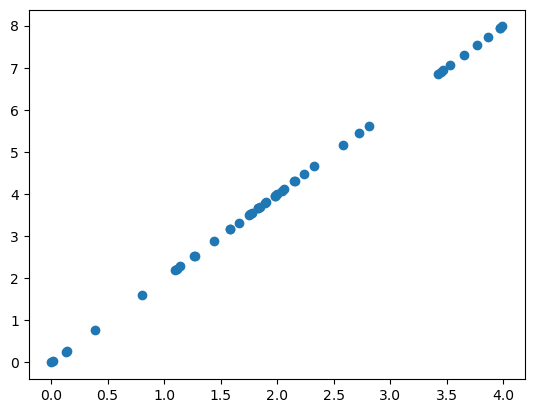

In [68]:
import matplotlib.pyplot as plt
plt.scatter(xn1,yn1)

In [69]:
def funcion_de_costo(beta, X, y):
    r,c= X.shape
    beta= np.reshape(beta,[c,1])
    y_pred= X @ beta
    error= y_pred-y
    return (error.T @ error)[0][0]

Polinomio de grado 1

In [70]:
ones= np.ones([m1,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn1.values,[m1,1])
X= np.hstack((ones,x_factor))
y_vector= np.reshape(yn1.values,[m1,1])

In [72]:
beta= [1,1]
import scipy.optimize as opt
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 2.6571974051743247e-14
 hess_inv: array([[ 0.04932217, -0.01874942],
       [-0.01874942,  0.00914218]])
      jac: array([2.13795412e-13, 8.17562203e-13])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([3.55278439e-08, 1.99999998e+00])

Polinomio de grado 2

In [73]:
ones= np.ones([m1,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn1.values,[m1,1])
x2_factor= np.reshape(xn1.values**2,[m1,1])
X= np.hstack((ones,x_factor,x2_factor))
y_vector= np.reshape(yn1.values,[m1,1])

In [74]:
beta= [1,1,1]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 1.4210915008658507e-11
 hess_inv: array([[ 0.10845663, -0.09445425,  0.01783324],
       [-0.09445425,  0.10619874, -0.02287746],
       [ 0.01783324, -0.02287746,  0.00539403]])
      jac: array([-8.89107126e-06,  3.91029024e-06,  1.68548436e-06])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([-1.65185537e-06,  2.00000169e+00, -3.57205525e-07])

Polinomio de grado 3

In [75]:
ones= np.ones([m1,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn1.values,[m1,1])
x2_factor= np.reshape(xn1.values**2,[m1,1])
x3_factor= np.reshape(xn1.values**3,[m1,1])
X= np.hstack((ones,x_factor,x2_factor,x3_factor))
y_vector= np.reshape(yn1.values,[m1,1])

In [76]:
beta= [1,1,1,1]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 2.6892261441852326e-10
 hess_inv: array([[ 0.1366463 , -0.22239235,  0.10587256, -0.01496056],
       [-0.22239235,  0.66936733, -0.40811876,  0.06530595],
       [ 0.10587256, -0.40811876,  0.26860966, -0.04459849],
       [-0.01496056,  0.06530595, -0.04459849,  0.00755513]])
      jac: array([4.83193834e-07, 1.28723051e-06, 4.48593426e-06, 1.62872278e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 272
      nit: 8
     njev: 52
   status: 2
  success: False
        x: array([ 3.73237465e-06,  1.99998285e+00,  1.18914991e-05, -2.03212304e-06])

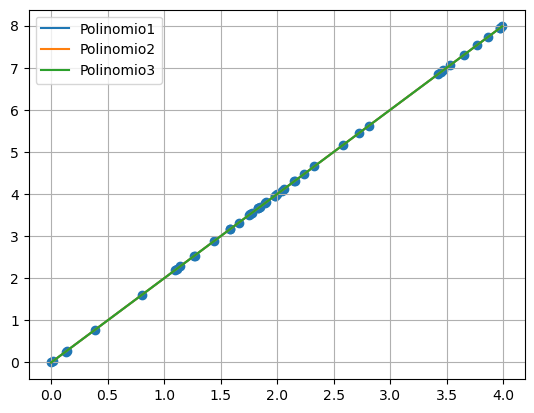

In [82]:
plt.figure()
plt. scatter(xn1,yn1)
plt.plot(xn1, 0.00000003552+ 2*xn1, label="Polinomio1")
plt.plot(xn1, -0.00000165 +  2*xn1 - 0.0000003572* xn1**2, label= "Polinomio2")
plt.plot(xn1, 0.0000037 + 2*xn1 + 0.000011* xn1**2- 0.00000203* xn1**3, label= "Polinomio3")
plt.grid()
plt.legend()

Estas son las 3 curvas de grado 1,2 y 3 que mejor se ajustan a los datos

4. Grafica los errores de tus tres modelos.

<BarContainer object of 3 artists>

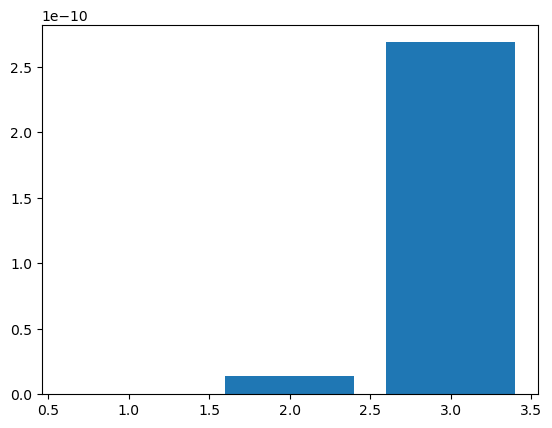

In [83]:
no_terminos=[1,2,3]
error=[2.6571974051743247e-14,1.4210915008658507e-11,2.6892261441852326e-10]

plt.figure()
plt.bar(no_terminos,error)

    Con un polimonio de grado 3 el error es mas grande a comparacion de polinomios de grado 1 y 2. El que mejor se ajusta a los datos es el polinomio de grado 1

5. Crea una función que regrese un valor real de la duración de la batería a partir de la entrada de cuánto tiempo se cargó la tableta.

`def nombre_de_funcion(tiempo) : etc`

In [109]:
def f(x) :
    if x<=4 and x>=0:
        return  0.00000003552+ 2*x
    else: 
        if x<=0:
            return 0
        else:
            return 8


6. ¿Cuánto tiempo podrá ver Netflix si se carga la tableta por 18 horas?

In [113]:
f(18)

8

Si la tableta se carga por 18 horas la duración permanecerá constante en 8 horas

## Correciones
- ¿Qué error fue?
Lo que sucedió fue que no realicé una limpieza correcta de los datos ya que analizando el problema podemos observar que los datos de las cargas arriba de 4 horas eran irrelevantes ya que se volvía una constante
- ¿Cómo lo solucioné?
Filtrando los datos y eliminando todo lo de arriba de 4 horas de carga para ahora si poder hacer la regresión y definitivamente los polinomios se ajustaron mucho mejor
- ¿Qué puedo hacer para evitar este error en el futuro?
Analizar un poco mejor la información y no hacer por automático los pasos sin anter revisar si los datos son funcionales en mi problema o no